In [92]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

In [123]:
# import dataset
df = pd.read_csv("../data/coffee_sales.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")
print(df.head())

   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort       Date             Time  
0            5          3 2024-03-01  10:15:50.520000  
1            5          3 2024-03-01  12:19:22.539000  
2            5          3 2024-03-01  12:20:18.089000  
3            5          3 2024-03-01  13:46:33.006000  
4            5          3 2024-03-01  13:48:14.626000  


In [94]:
# aggregate daily sales
agg_df = df.groupby("Date")["money"].sum().reset_index()
agg_df.head()

,Date,money
0,2024-03-01,396.3
1,2024-03-02,188.1
2,2024-03-03,309.1
3,2024-03-04,135.2
4,2024-03-05,338.5


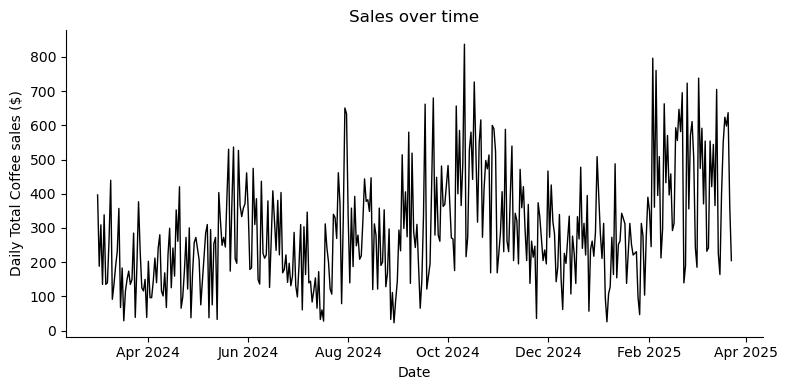

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(agg_df["Date"], agg_df["money"], color="black", linewidth=1)

# Format x-axis as Month-Year
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # show every 2 months

ax.set_xlabel("Date")
ax.set_ylabel("Daily Total Coffee sales ($)")
ax.set_title("Sales over time")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

In [ ]:
# aggragate by month
df["month_num"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year
agg_month = df.groupby(["month_num", "year"])["money"].sum().reset_index()
agg_month

,month_num,year,money
0,1,2025,6398.86
1,2,2025,13215.48
2,3,2024,5905.20
3,3,2025,9986.44
4,4,2024,5719.56
5,5,2024,8164.42
6,6,2024,7617.76
7,7,2024,6915.94
8,8,2024,7613.84
9,9,2024,9988.64


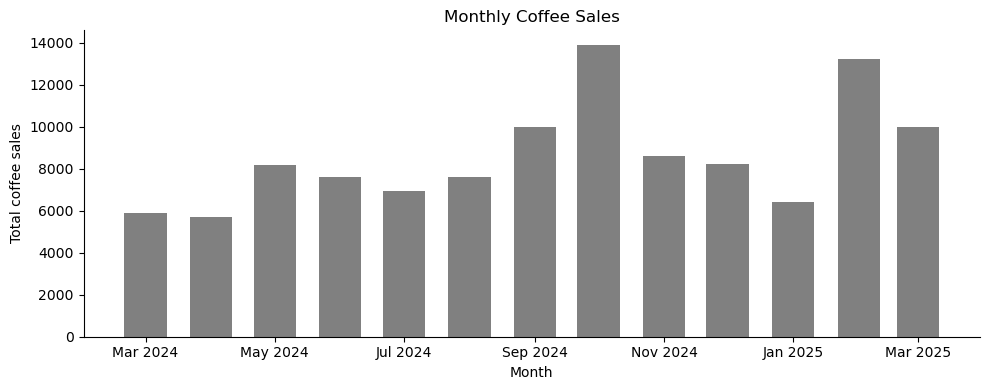

In [ ]:
# Create a month-year column for nicer x-axis labels
agg_month["month_year"] = pd.to_datetime(
    agg_month["year"].astype(str) + "-" + agg_month["month_num"].astype(str) + "-01"
)

# Sort by date to ensure chronological order
agg_month = agg_month.sort_values("month_year")

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(agg_month["month_year"], agg_month["money"], color="grey", width=20)

# Format x-axis labels as Month-Year
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %Y"))

# Labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Total coffee sales")
ax.set_title("Monthly Coffee Sales")

# Clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.xticks(rotation=0, ha="center")
plt.tight_layout()
# plt.savefig("sales_months.svg")
plt.show()

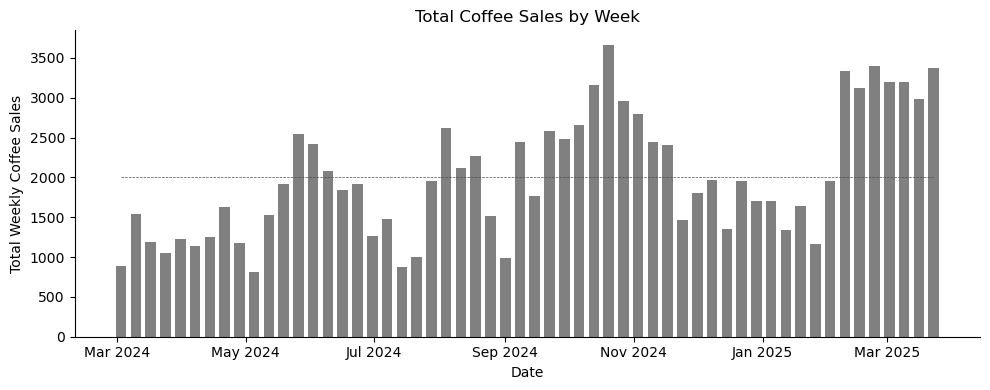

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure Date is a datetime column
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate weekly totals
agg_week = (
    df.groupby(pd.Grouper(key="Date", freq="W"))["money"]
    .sum()
    .reset_index()
    .sort_values("Date")
)

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(agg_week["Date"], agg_week["money"], color="grey", width=5)  # weekly totals

# Format x-axis as Month-Year
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %Y"))

# Labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Total Weekly Coffee Sales")
ax.set_title("Total Coffee Sales by Week")

# Clean look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add horizontal line for mean
ax.hlines(
    y=agg_week["money"].mean(),
    xmin=agg_week["Date"].min(),
    xmax=agg_week["Date"].max(),
    colors="red",
    linestyles="--",
    linewidth=0.5,
    label=f"Mean",
)
# ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

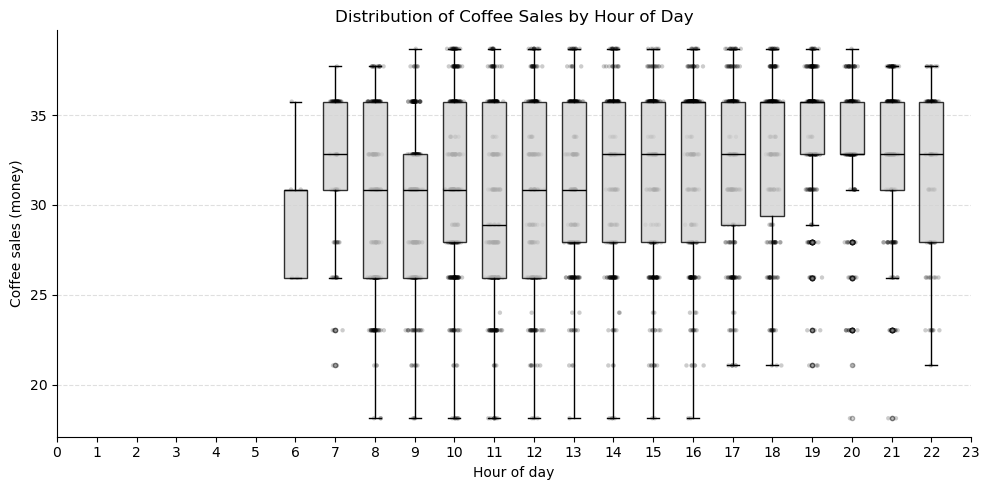

In [ ]:
# Ensure numeric and sorted
df["hour_of_day"] = df["hour_of_day"].astype(int)
hours = sorted(df["hour_of_day"].unique())

fig, ax = plt.subplots(figsize=(10, 5))

# --- Boxplot ---
bp = ax.boxplot(
    [df.loc[df["hour_of_day"] == h, "money"] for h in hours],
    positions=hours,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="lightgray", color="black", alpha=0.8),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=3, markerfacecolor="gray", alpha=0.3),
)

# --- Overlay points ---
for i, h in enumerate(hours):
    y = df.loc[df["hour_of_day"] == h, "money"]
    # add a little horizontal jitter so points don't overlap exactly
    x = np.random.normal(h, 0.08, size=len(y))
    ax.scatter(x, y, alpha=0.2, color="black", s=10, edgecolor="none")

# Labels
ax.set_xlabel("Hour of day")
ax.set_ylabel("Coffee sales (money)")
ax.set_title("Distribution of Coffee Sales by Hour of Day")

# Clean up look
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

In [102]:
# check the days over time (eg. Mondays over the year)
# time of the day

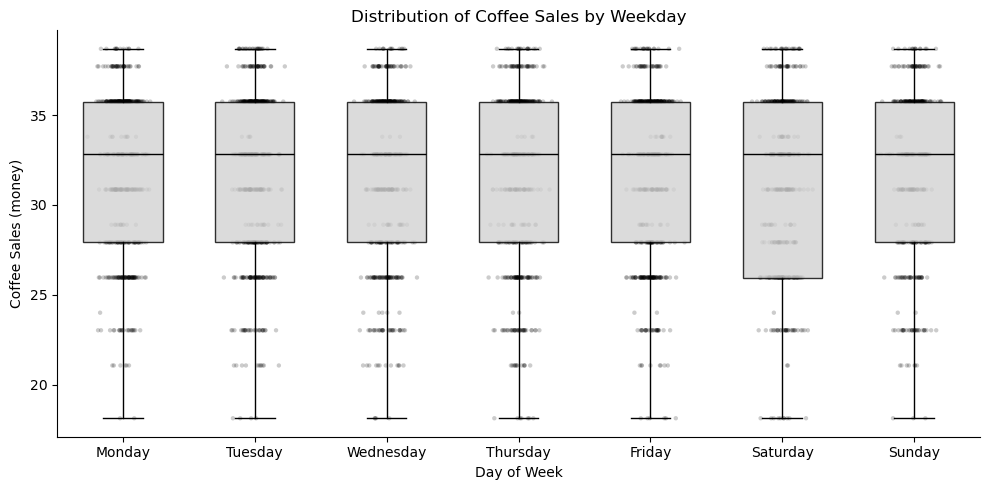

In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Convert Date column to weekday name ---
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df["Date"].dt.day_name()

# --- Ensure weekdays are in correct order ---
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
days = [d for d in day_order if d in df["Weekday"].unique()]

# --- Create boxplot ---
fig, ax = plt.subplots(figsize=(10, 5))

bp = ax.boxplot(
    [df.loc[df["Weekday"] == d, "money"] for d in days],
    positions=np.arange(len(days)),
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="lightgray", color="black", alpha=0.8),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=3, markerfacecolor="gray", alpha=0.3),
)

# --- Overlay jittered points ---
for i, d in enumerate(days):
    y = df.loc[df["Weekday"] == d, "money"].dropna()
    if len(y):
        x = np.random.normal(i, 0.08, size=len(y))
        ax.scatter(x, y, alpha=0.2, color="black", s=10, edgecolor="none")

# avg line
# ax.axhline(
#     df["money"].mean(),
#     color="red",
#     linestyle="--",
#     linewidth=2,
#     label="Overall average",
# )

# --- Labels & styling ---
ax.set_xlabel("Day of Week")
ax.set_ylabel("Coffee Sales (money)")
ax.set_title("Distribution of Coffee Sales by Weekday")
ax.set_xticks(np.arange(len(days)))
ax.set_xticklabels(days)
# ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

In [112]:
df["Date"] = pd.to_datetime(df["Date"])

# --- Filter for October 2024 and February 2025 ---
df_filtered = df[
    ((df["Date"].dt.year == 2024) & (df["Date"].dt.month == 10))
    | ((df["Date"].dt.year == 2025) & (df["Date"].dt.month == 2))
].copy()

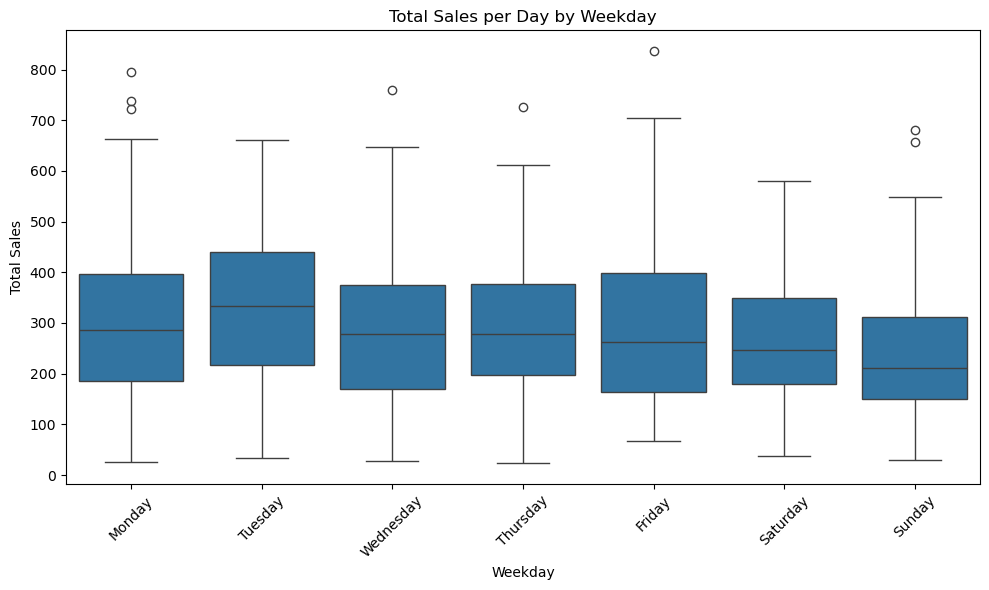

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])


df_filtered = df

# Compute total sales per day
daily_sales = (
    df_filtered.groupby(df_filtered["Date"].dt.date)["money"].sum().reset_index()
)
daily_sales["Weekday"] = pd.to_datetime(daily_sales["Date"]).dt.day_name()

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=daily_sales,
    x="Weekday",
    y="money",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)
plt.title("Total Sales per Day by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

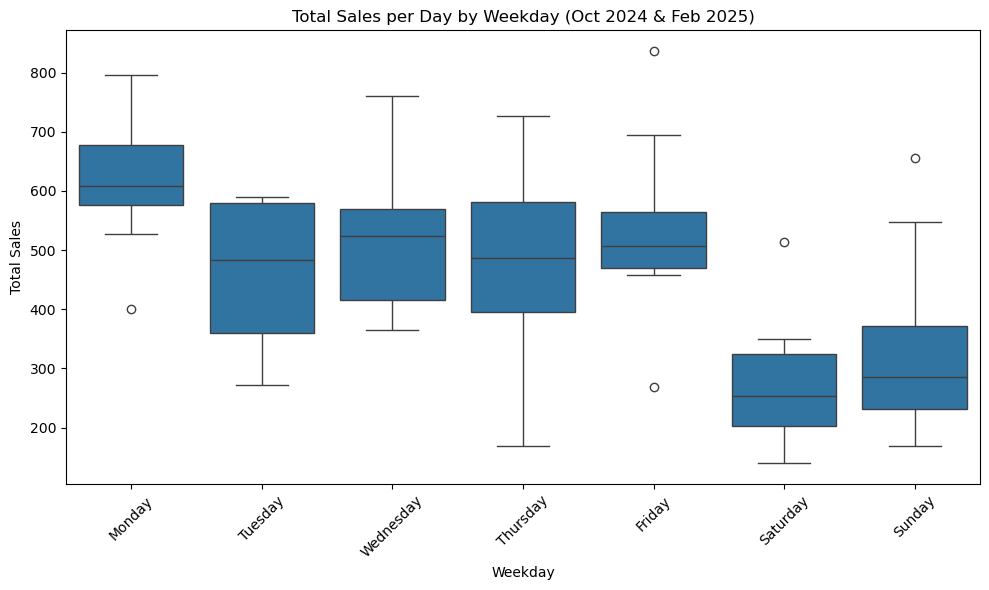

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Filter for October 2024 and February 2025
mask = (df["Date"].dt.month == 10) & (df["Date"].dt.year == 2024) | (
    (df["Date"].dt.month == 2) & (df["Date"].dt.year == 2025)
)
df_filtered = df.loc[mask]

# Compute total sales per day
daily_sales = (
    df_filtered.groupby(df_filtered["Date"].dt.date)["money"].sum().reset_index()
)
daily_sales["Weekday"] = pd.to_datetime(daily_sales["Date"]).dt.day_name()

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=daily_sales,
    x="Weekday",
    y="money",
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)
plt.title("Total Sales per Day by Weekday (Oct 2024 & Feb 2025)")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For the highest month, weedays are busier

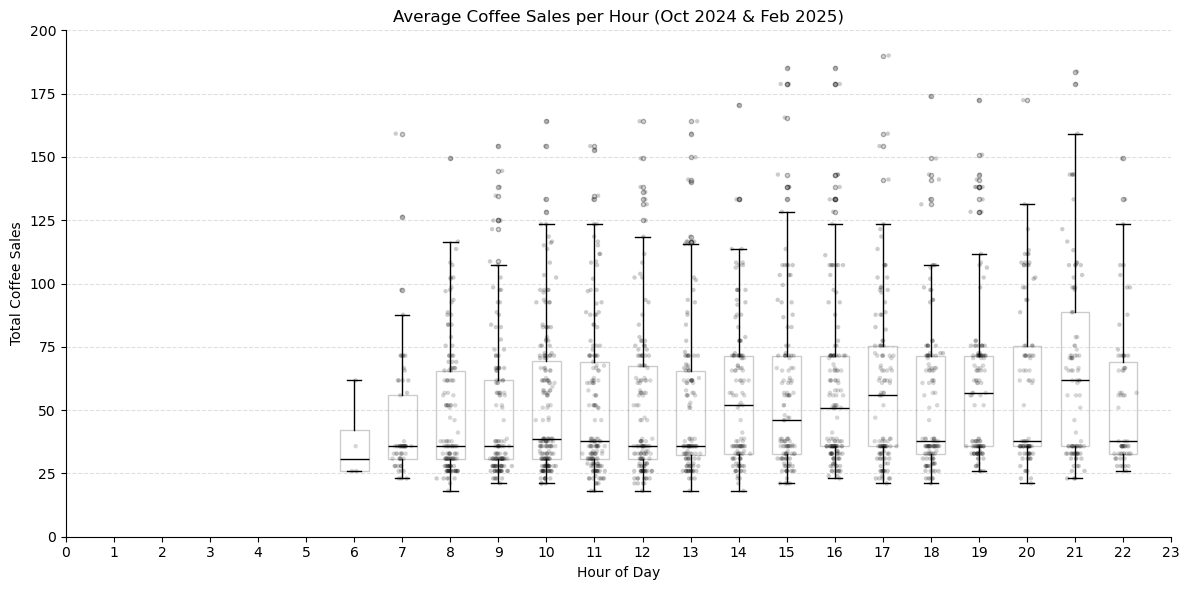

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Optional: filter for months you care about (e.g., Oct 2024 and Feb 2025)
df_filtered = df

# --- Aggregate total sales per day per hour ---
hourly_sales = df_filtered.groupby(["Date", "hour_of_day"])["money"].sum().reset_index()

# --- Boxplot of total sales per hour of day ---
hours = sorted(hourly_sales["hour_of_day"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# List of total sales per hour
data_per_hour = [
    hourly_sales.loc[hourly_sales["hour_of_day"] == h, "money"].values for h in hours
]

bp = ax.boxplot(
    data_per_hour,
    positions=hours,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="white", color="black", alpha=0.2),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=3, markerfacecolor="gray", alpha=0.3),
)

# Overlay jittered points
for i, h in enumerate(hours):
    y = hourly_sales.loc[hourly_sales["hour_of_day"] == h, "money"].values
    if len(y):
        x = np.random.normal(h, 0.08, size=len(y))
        ax.scatter(x, y, alpha=0.2, color="black", s=10, edgecolor="none")


# Labels & styling
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total Coffee Sales")
ax.set_title("Average Coffee Sales per Hour (Oct 2024 & Feb 2025)")
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.set_ylim(0, 200)
plt.tight_layout()
plt.show()

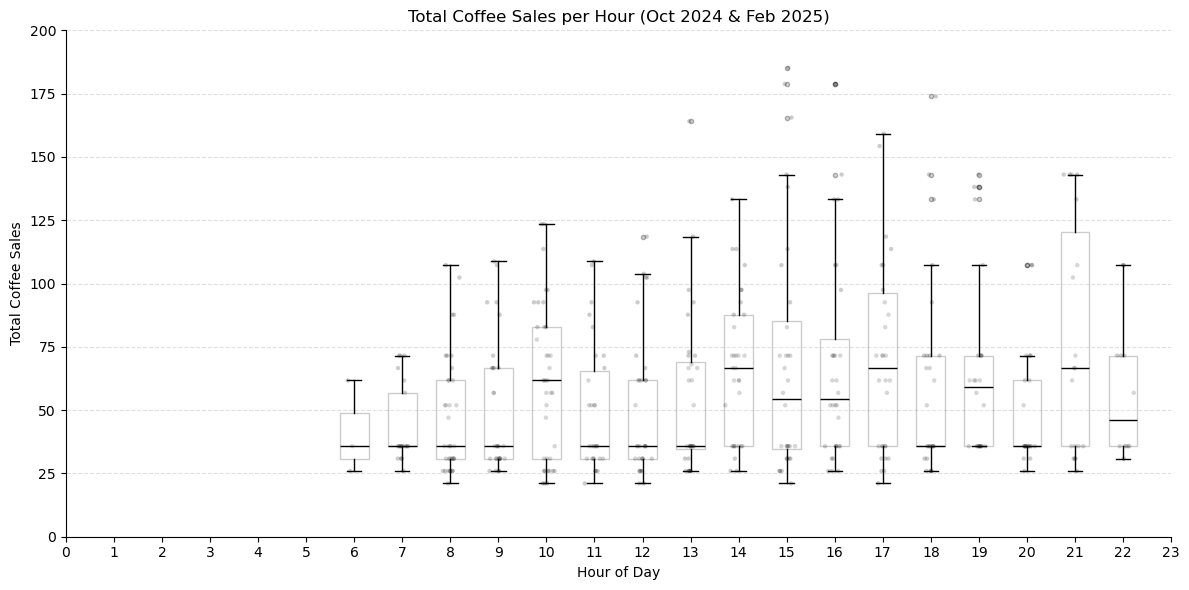

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Optional: filter for months you care about (e.g., Oct 2024 and Feb 2025)
df_filtered = df[
    ((df["Date"].dt.year == 2024) & (df["Date"].dt.month == 10))
    | ((df["Date"].dt.year == 2025) & (df["Date"].dt.month == 2))
].copy()

# --- Aggregate total sales per day per hour ---
hourly_sales = df_filtered.groupby(["Date", "hour_of_day"])["money"].sum().reset_index()

# --- Boxplot of total sales per hour of day ---
hours = sorted(hourly_sales["hour_of_day"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# List of total sales per hour
data_per_hour = [
    hourly_sales.loc[hourly_sales["hour_of_day"] == h, "money"].values for h in hours
]

bp = ax.boxplot(
    data_per_hour,
    positions=hours,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor="white", color="black", alpha=0.2),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=3, markerfacecolor="gray", alpha=0.3),
)

# Overlay jittered points
for i, h in enumerate(hours):
    y = hourly_sales.loc[hourly_sales["hour_of_day"] == h, "money"].values
    if len(y):
        x = np.random.normal(h, 0.08, size=len(y))
        ax.scatter(x, y, alpha=0.2, color="black", s=10, edgecolor="none")


# Labels & styling
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Total Coffee Sales")
ax.set_title("Total Coffee Sales per Hour (Oct 2024 & Feb 2025)")
ax.set_xticks(range(0, 24))
ax.set_xticklabels(range(0, 24))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.set_ylim(0, 200)
plt.tight_layout()
plt.show()

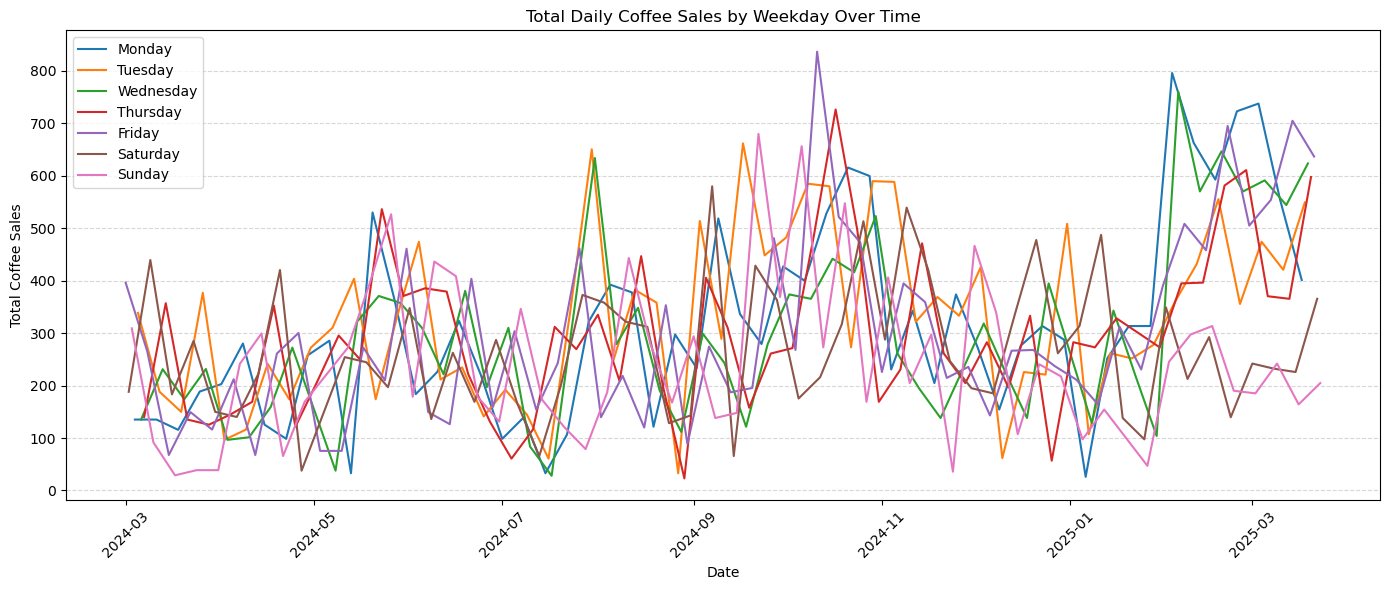

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate total sales per day
daily_sales = df.groupby("Date")["money"].sum().reset_index()

# Add weekday name
daily_sales["Weekday"] = daily_sales["Date"].dt.day_name()

# Optional: keep weekdays in order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Plot total sales over time for each weekday
plt.figure(figsize=(14, 6))
for weekday in weekday_order:
    df_weekday = daily_sales[daily_sales["Weekday"] == weekday]
    plt.plot(
        df_weekday["Date"],
        df_weekday["money"],
        linestyle="-",
        label=weekday,
    )

plt.xlabel("Date")
plt.ylabel("Total Coffee Sales")
plt.title("Total Daily Coffee Sales by Weekday Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

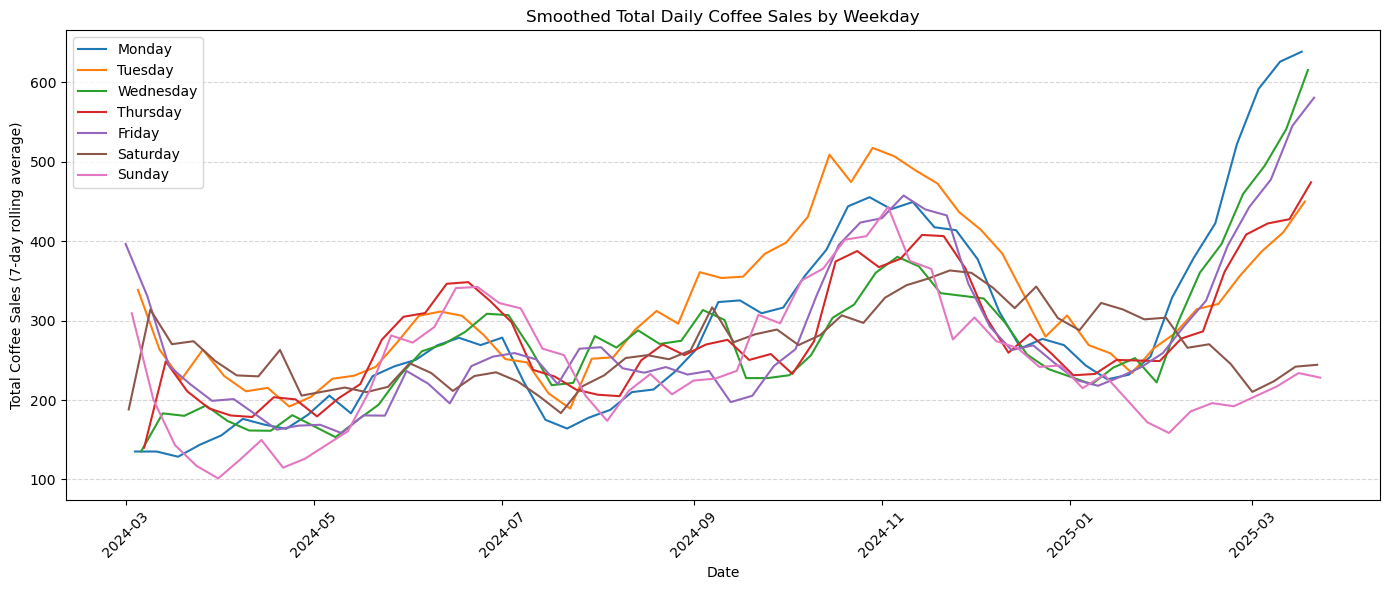

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate total sales per day
daily_sales = df.groupby("Date")["money"].sum().reset_index()
daily_sales["Weekday"] = daily_sales["Date"].dt.day_name()

# Ensure weekday order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Apply rolling smoothing for each weekday
plt.figure(figsize=(14, 6))
for weekday in weekday_order:
    df_weekday = daily_sales[daily_sales["Weekday"] == weekday].sort_values("Date")
    # Apply 7-day rolling mean
    df_weekday["smoothed"] = df_weekday["money"].rolling(window=7, min_periods=1).mean()
    plt.plot(df_weekday["Date"], df_weekday["smoothed"], label=weekday)

plt.xlabel("Date")
plt.ylabel("Total Coffee Sales (7-day rolling average)")
plt.title("Smoothed Total Daily Coffee Sales by Weekday")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

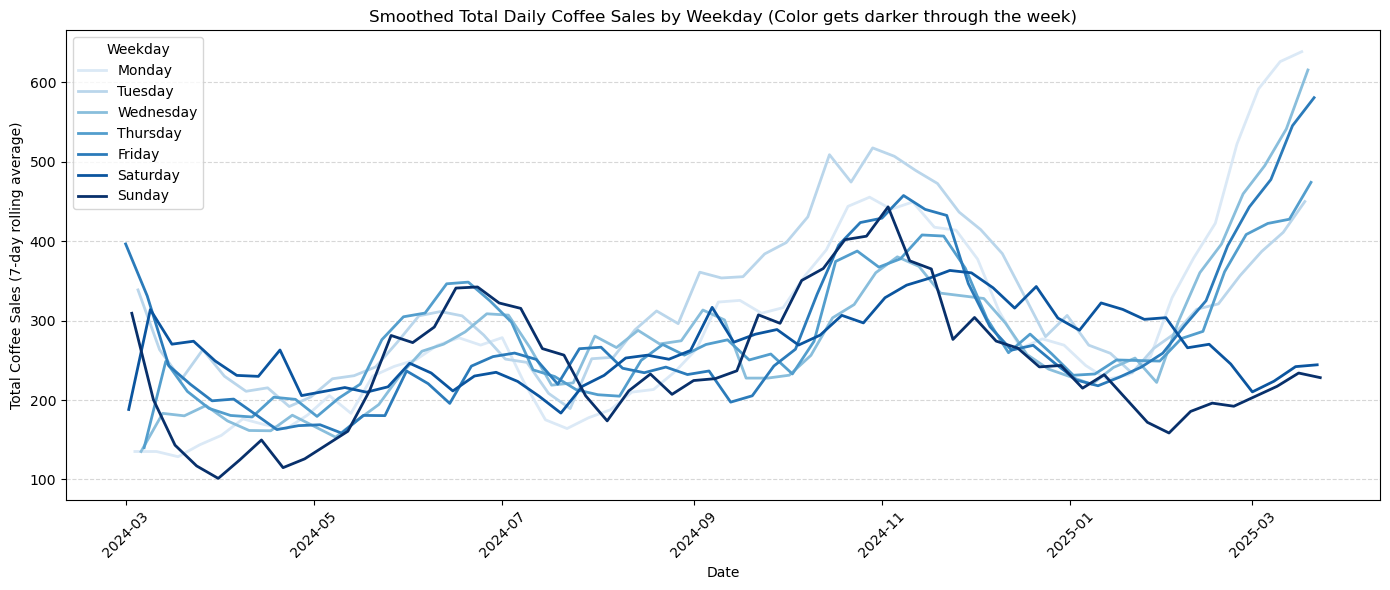

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Ensure Date is datetime
df["Date"] = pd.to_datetime(df["Date"])

# Aggregate total sales per day
daily_sales = df.groupby("Date")["money"].sum().reset_index()
daily_sales["Weekday"] = daily_sales["Date"].dt.day_name()

# Ensure weekday order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Create a sequential colormap (light to dark)
cmap = plt.get_cmap("Blues")
colors = [cmap((i + 1) / len(weekday_order)) for i in range(len(weekday_order))]

plt.figure(figsize=(14, 6))
for i, weekday in enumerate(weekday_order):
    df_weekday = daily_sales[daily_sales["Weekday"] == weekday].sort_values("Date")
    # Apply 7-day rolling mean
    df_weekday["smoothed"] = df_weekday["money"].rolling(window=7, min_periods=1).mean()
    plt.plot(
        df_weekday["Date"],
        df_weekday["smoothed"],
        label=weekday,
        color=colors[i],
        linewidth=2,
    )

plt.xlabel("Date")
plt.ylabel("Total Coffee Sales (7-day rolling average)")
plt.title(
    "Smoothed Total Daily Coffee Sales by Weekday (Color gets darker through the week)"
)
plt.legend(title="Weekday")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()